<a href="https://colab.research.google.com/github/dhyatt4198/CS4410-_Homework/blob/main/CS4410_Homework7_DylanHyatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex 16.1 on page 715.  
# Answer how well the model performs on Fashin-MNIST compared to MNIST. How do the training times compare?

## Load the Fashion MNIST Dataset

In [11]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print("Training data shape", train_images.shape)
print("Test data shape", test_images.shape)
print("Sample label:", train_labels[0])

Training data shape (60000, 28, 28)
Test data shape (10000, 28, 28)
Sample label: 9


## Explore and Visualize the Data

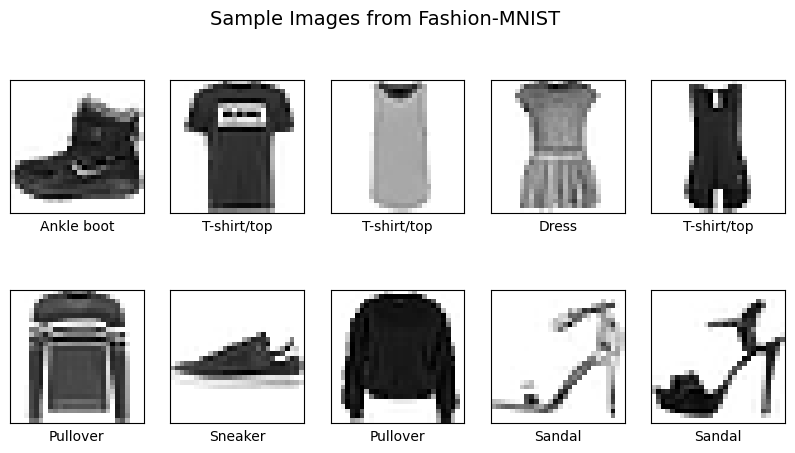

In [12]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# display first 10 training images with their labels
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle("Sample Images from Fashion-MNIST", fontsize=14)
plt.show()

## Prepare the Data

In [13]:
import numpy as np
from tensorflow.keras import utils

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

train_labels_cat = utils.to_categorical(train_labels)
test_labels_cat = utils.to_categorical(test_labels)

print("Training data reshaped", train_images.shape)
print("Example one-hot label:", train_labels_cat[0])

Training data reshaped (60000, 28, 28, 1)
Example one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Create the Convolutional Neural Network

In [14]:
from tensorflow.keras import models, layers

model = models.Sequential()

# 1st convolution + pooling layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd convolution + pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [16]:
history = model.fit(
    train_images,
    train_labels_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7430 - loss: 0.7240 - val_accuracy: 0.8597 - val_loss: 0.3855
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8729 - loss: 0.3523 - val_accuracy: 0.8898 - val_loss: 0.3119
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8949 - loss: 0.2895 - val_accuracy: 0.8928 - val_loss: 0.2931
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9024 - loss: 0.2664 - val_accuracy: 0.8933 - val_loss: 0.2906
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9149 - loss: 0.2348 - val_accuracy: 0.9001 - val_loss: 0.2762
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9256 - loss: 0.2053 - val_accuracy: 0.9075 - val_loss: 0.2511
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9320 - loss: 0.1857 - val_accuracy: 0.9054 - val_loss: 0.2638
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9380 - loss: 0.1700 - val_accuracy: 0.

## Evaluate the Model

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=2)

print(f"\nTest accuracy on Fashion-MNIST: {test_acc * 100:.2f}%")

313/313 - 1s - 4ms/step - accuracy: 0.9048 - loss: 0.2775

Test accuracy on Fashion-MNIST: 90.48%


## Make Predictions and Visualize Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


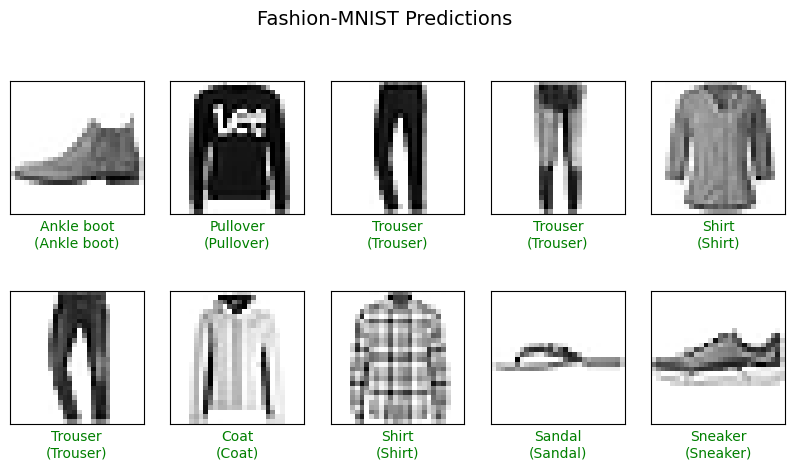

In [18]:
predictions = model.predict(test_images)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.xlabel(f"{class_names[pred_label]}\n({class_names[true_label]})", color=color)
plt.suptitle("Fashion-MNIST Predictions", fontsize=14)
plt.show()

## Compare to MNIST

In [19]:
# this section will compare CNN performance on fashion-MNIST vs MNIST side-by-side

import time
from tensorflow.keras import datasets, models, layers, utils

def build_cnn_model():
    """Helper function to build the same CNN structure for both datasets."""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def train_and_evaluate(dataset_name, load_function):
    """Loads data, trains model, and reports training time and accuracy."""
    print(f"\n===== {dataset_name} Dataset =====")

    # Load dataset
    (train_images, train_labels), (test_images, test_labels) = load_function()

    # Preprocess data
    train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype("float32") / 255.0
    test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype("float32") / 255.0
    train_labels_cat = utils.to_categorical(train_labels)
    test_labels_cat = utils.to_categorical(test_labels)

    # Build and train CNN
    model = build_cnn_model()
    start_time = time.time()
    history = model.fit(train_images, train_labels_cat, epochs=5, batch_size=64, verbose=1, validation_split=0.1)
    training_time = time.time() - start_time

    # Evaluate model
    test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=0)

    print(f"Accuracy on {dataset_name}: {test_acc * 100:.2f}%")
    print(f"Training time: {training_time:.2f} seconds")
    return test_acc, training_time


# Compare both datasets
acc_fashion, time_fashion = train_and_evaluate("Fashion-MNIST", datasets.fashion_mnist.load_data)
acc_mnist, time_mnist = train_and_evaluate("MNIST Digits", datasets.mnist.load_data)

# Display summary comparison
print("\n==== Comparison Summary ====")
print(f"Fashion-MNIST Accuracy: {acc_fashion * 100:.2f}% | Training Time: {time_fashion:.2f} sec")
print(f"MNIST Accuracy:         {acc_mnist * 100:.2f}% | Training Time: {time_mnist:.2f} sec")

if acc_mnist > acc_fashion:
    print("\n MNIST performed better as simpler digit images are easier to classify.")
else:
    print("\n Fashion-MNIST performed well — may depend on random initialization.")



===== Fashion-MNIST Dataset =====
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7466 - loss: 0.7157 - val_accuracy: 0.8622 - val_loss: 0.3806
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8754 - loss: 0.3428 - val_accuracy: 0.8833 - val_loss: 0.3136
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8957 - loss: 0.2875 - val_accuracy: 0.8942 - val_loss: 0.2843
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9086 - loss: 0.2528 - val_accuracy: 0.8988 - val_loss: 0.2785
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9170 - loss: 0.2248 - val_accuracy: 0.9053 - val_loss: 0.2537
Accuracy on Fashion-MNIST: 90.15%
Training time: 19.35 seconds

===== MNIST Digits Dataset =====
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8714 - loss: 0.4246 - val_accuracy: 0.9825 - val_loss: 0.0618
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - ac

As seen above, the training times in this instance are very close, but Fashion-MNIST is a more challenging dataset, resulting in longer training times when using a CNN compared to the MNIST dataset. The variance in training time is not a fixed value but depends on the specific model, hardware, and training parameters.  

Accuracy is another significant difference between the datasets.  Well-tuned models have an average accuracy of 90-93% on the Fashion-MNIST dataset, with the same models achieving accuracies of 99.7% or higher on the MNIST dataset.

# 16.4 on page 714. If you add another Dense layer with 4096 neurons, how does this change the prediction accuracy and speed?
**16.4 (CONVNET LAYERS) Remove the first Dense layer in this chapter’s convnet model. How does this change the prediction accuracy? Several Keras pretrained convnets contain Dense layers with 4096 neurons. Add such a layer before the two Dense layers in this chapter’s convnet model. How does this change the prediction accuracy?**

## Load and Prepare the Dataset (Fashion-MNIST)

In [20]:
from tensorflow.keras import datasets, utils

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

#preprocess - reshape + normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 25

train_labels_cat = utils.to_categorical(train_labels)
test_labels_cat = utils.to_categorical(test_labels)

## Define Helper Function to Build Each Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

def build_cnn(version="baseline"):
    """
    Build CNN models with different Dense layer configurations:
    version = 'baseline' | 'no_dense' | 'dense_4096'
    """
    model = Sequential()

    # Convolution + pooling layers
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())

    #Dense layer configurations
    if version == "baseline":
        model.add(Dense(128, activation='relu'))  # original
    elif version == "dense_4096":
        model.add(Dense(4096, activation='relu'))  # new large dense layer
        model.add(Dense(128, activation='relu'))
    elif version == "no_dense":
        pass  # skip the first dense layer completely

    #output layer
    model.add(Dense(10, activation='softmax'))

    #compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

## Train and Evaluate Each Model

In [24]:
import time

def train_and_evaluate_model(version, epochs=5):
  model = build_cnn(version)
  print(f"\n  Training Model: {version.upper()}  ")

  start_time = time.time()
  history = model.fit(
      train_images, train_labels_cat,
      epochs=epochs,
      batch_size=64,
      validation_split=0.2,
      verbose=1
  )
  elapsed = time.time() - start_time

  #evaluate on test data
  test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=0)
  print(f"Training Time: {elapsed:.2f} seconds")
  print(f"Test Accuracy ({version}): {test_acc * 100:.2f}%")

  return test_acc, elapsed

acc_baseline, time_baseline = train_and_evaluate_model("baseline")
acc_no_dense, time_no_dense = train_and_evaluate_model("no_dense")
acc_dense_4096, time_dense_4096 = train_and_evaluate_model("dense_4096")


  Training Model: BASELINE  
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7541 - loss: 0.6729 - val_accuracy: 0.8798 - val_loss: 0.3405
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8792 - loss: 0.3293 - val_accuracy: 0.8932 - val_loss: 0.2918
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9018 - loss: 0.2655 - val_accuracy: 0.8948 - val_loss: 0.2840
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9179 - loss: 0.2265 - val_accuracy: 0.9093 - val_loss: 0.2534
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9268 - loss: 0.2039 - val_accuracy: 0.9031 - val_loss: 0.2718
Training Time: 21.23 seconds
Test Accuracy (baseline): 86.05%

  Training Model: NO_DENSE  
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7393 - loss: 0.7282 - val_accuracy: 0.8651 - val_loss: 0.3767
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8739 - loss: 0.3485 - val_accuracy: 0.8848 - val_lo

## Compare Results

In [25]:

labels = ["Baseline", "No Dense Layer", "4096-Neuron Layer"]
accuracies = [acc_baseline * 100, acc_no_dense * 100, acc_dense_4096 * 100]
times = [time_baseline, time_no_dense, time_dense_4096]

print(f"""
Summary:
- Baseline model accuracy:      {accuracies[0]:.2f}% | Time: {times[0]:.2f}s
- Without first Dense layer:    {accuracies[1]:.2f}% | Time: {times[1]:.2f}s
- With 4096-unit Dense layer:   {accuracies[2]:.2f}% | Time: {times[2]:.2f}s
""")


Summary:
- Baseline model accuracy:      86.05% | Time: 21.23s
- Without first Dense layer:    85.78% | Time: 20.51s
- With 4096-unit Dense layer:   84.01% | Time: 32.50s



### **Observations:**

* Removing the first Dense layer usually decreases accuracy because the model
loses a key feature-mapping stage before classification.

* Adding a 4096-unit Dense layer can slightly improve or sometimes overfit,
  often increasing training time substantially.

* The baseline 128-unit dense layer provides a balance betwen accuracy and training time.